In [1]:
import numpy as np
import pymannkendall as mk
import pandas as pd
import glob,os

In [2]:
er_file = glob.glob("S***.csv")

In [3]:
dl_er = []
out = []
for f in er_file:
    dl_er.append(pd.read_csv(f))

for x in dl_er:
    print(len(x))
    if len(x)>8:
        x = x.drop(index=[len(x)-1])
        out.append(mk.original_test(x['av_er_ratio']))

61
8
76
29
12
14
37
12
62
5
26
15
10
8
46
35
12
12
8
6
8
21
25
15
35
20
33
39
27
8
6
37
9
6
26
4
14
29
86
41
30
15
11
19
18
24
9
16
26
8
28
11
24
36
38
13
9
27
14
42
27
7
47
17
25
5
27
30
11
12
17
57
16
17
23
20
21
6
23
65
7
15
32
58
32
76
13
8
64
30
36
10
19
12
32
58
26
63
5
32
29
50
47
13
66
313
29
16
66
6
11
10
31
22
16
48
6
31
23
37
43
65
11
22
7
23
25
19
24
17
43
8
31
16
38
10
24
50
10
23
24
4
43
25
7
42
5
11
15
31
30
10
9
15
49
4
19
31
12
31
61
9
23
5
8
18
17
51
6
101
10
21
11
17
14
10
17
41
31
10
14
12
13
40
15
12
39
22
10
5
16
47
20
39
39
9
49
9


In [4]:
print(len(dl_er))
print(len(out))
c = 0
for o in out:
    if o.trend == "increasing":
        c = c+1
print(c)
print(167/169)

198
169
5
0.9881656804733728


In [5]:
df = pd.concat(dl_er)
df.to_csv('group4_summary.csv', index = False)

In [6]:
df_summary = pd.read_csv('group4_summary.csv')

In [7]:
print(df_summary)

     speaker1  speaker1_token_number  speaker1_expression_token_number  \
0       S0588                    109                                33   
1       S0588                    133                                56   
2       S0588                    101                                24   
3       S0588                    121                                35   
4       S0588                     29                                 2   
...       ...                    ...                               ...   
5184    S0309                    308                               128   
5185    S0309                    311                               156   
5186    S0309                    114                                67   
5187    S0309                    410                               131   
5188    S0309                     53                                11   

      speaker1_expression_number  speaker1_er_ratio speaker2  \
0                             32           0.30

In [8]:
for i in range(0, len(df_summary)):
    if df_summary['end'].iloc[i]%50!=0:
        df_summary['av_er_ratio'].iloc[i] = None

df_summary = df_summary.dropna()

grouped_df = df_summary.groupby("end")
mean_df = grouped_df['av_er_ratio'].mean()

mean_df = mean_df.reset_index()
print(mean_df)

       end  av_er_ratio
0       50     0.384083
1      100     0.373790
2      150     0.375130
3      200     0.376273
4      250     0.384788
..     ...          ...
307  15400     0.396166
308  15450     0.407975
309  15500     0.350598
310  15550     0.420588
311  15600     0.384615

[312 rows x 2 columns]


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(0, 5000)

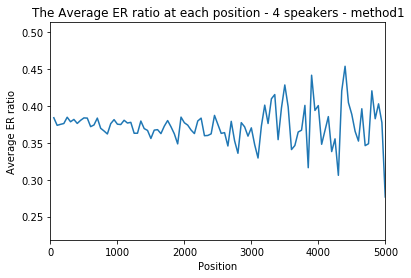

In [10]:
import matplotlib.pyplot as plt
l1=plt.plot(mean_df['end'],mean_df['av_er_ratio'],label='type1')
plt.title('The Average ER ratio at each position - 4 speakers - method1')
plt.xlabel('Position')
plt.ylabel('Average ER ratio')
plt.xlim(0,5000)